# *Face recognition project*

In [38]:
#Import keras for building the Convolutional Neural Network
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import (f1_score, recall_score, precision_score,
                             roc_auc_score, roc_curve, auc)

In [1]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data, face images and their target i.e. perosn number
data = np.load("/content/olivetti_faces.npy")
target = np.load("/content/olivetti_faces_target.npy")

In [3]:
#print the size of data and target
#Data has 400 images of size 64 x 64 pixels (grayscale)
#Target has information about class of all 400 images
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


In [4]:
#Identity number of unique persons (ids) in the trarget data
#For ORL / Olivetti face dataset this there are 40 people
#The dataset contains 10 images of each person. Therefore 40 x 10 = 400 images
unique_ids=np.unique(target)
print(len(unique_ids))


40


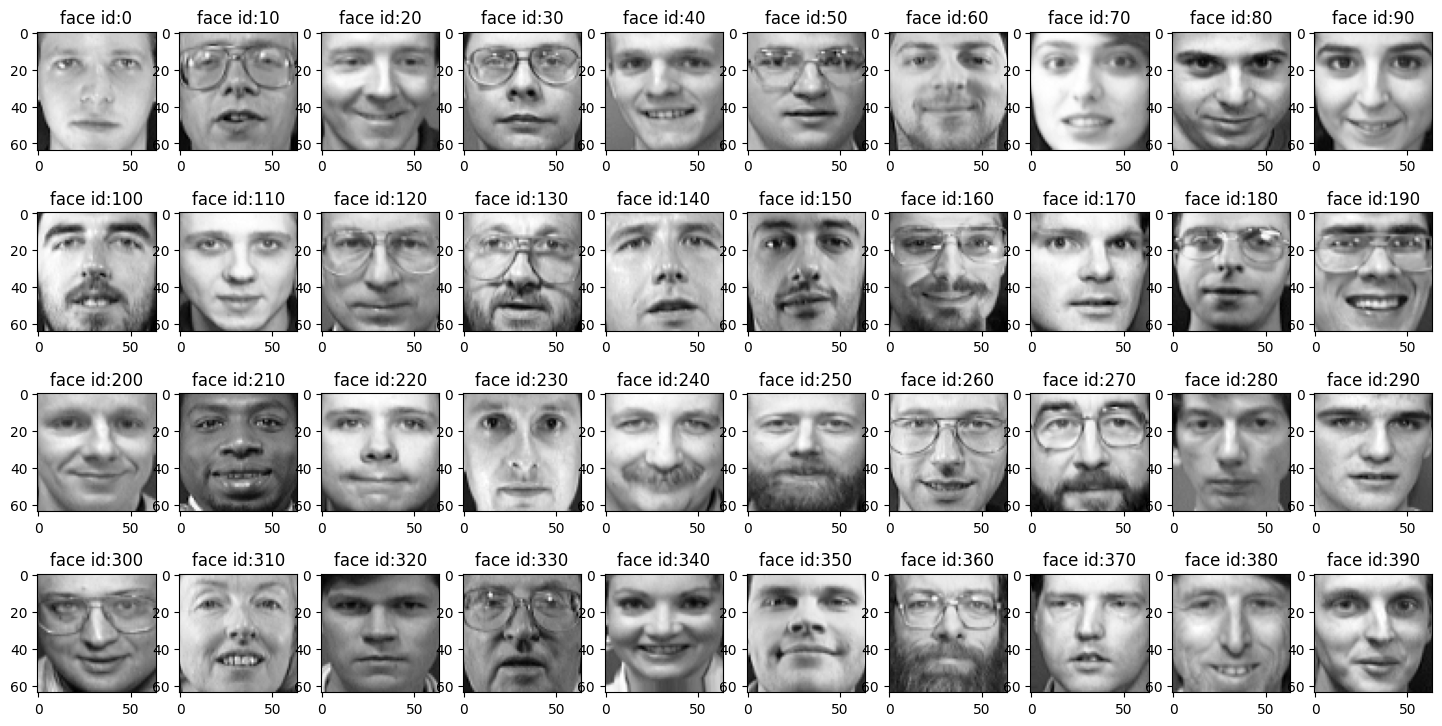

In [11]:
#Display one sample image for each person
#Display the 40 images in 4 rows with each row having 10 images
fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr = axarr.flatten()
imgs=data
for id in unique_ids:
    img_id = id * 10
    axarr[id].imshow(imgs[img_id], cmap='gray')
    axarr[id].set_title("face id:{}".format(img_id))


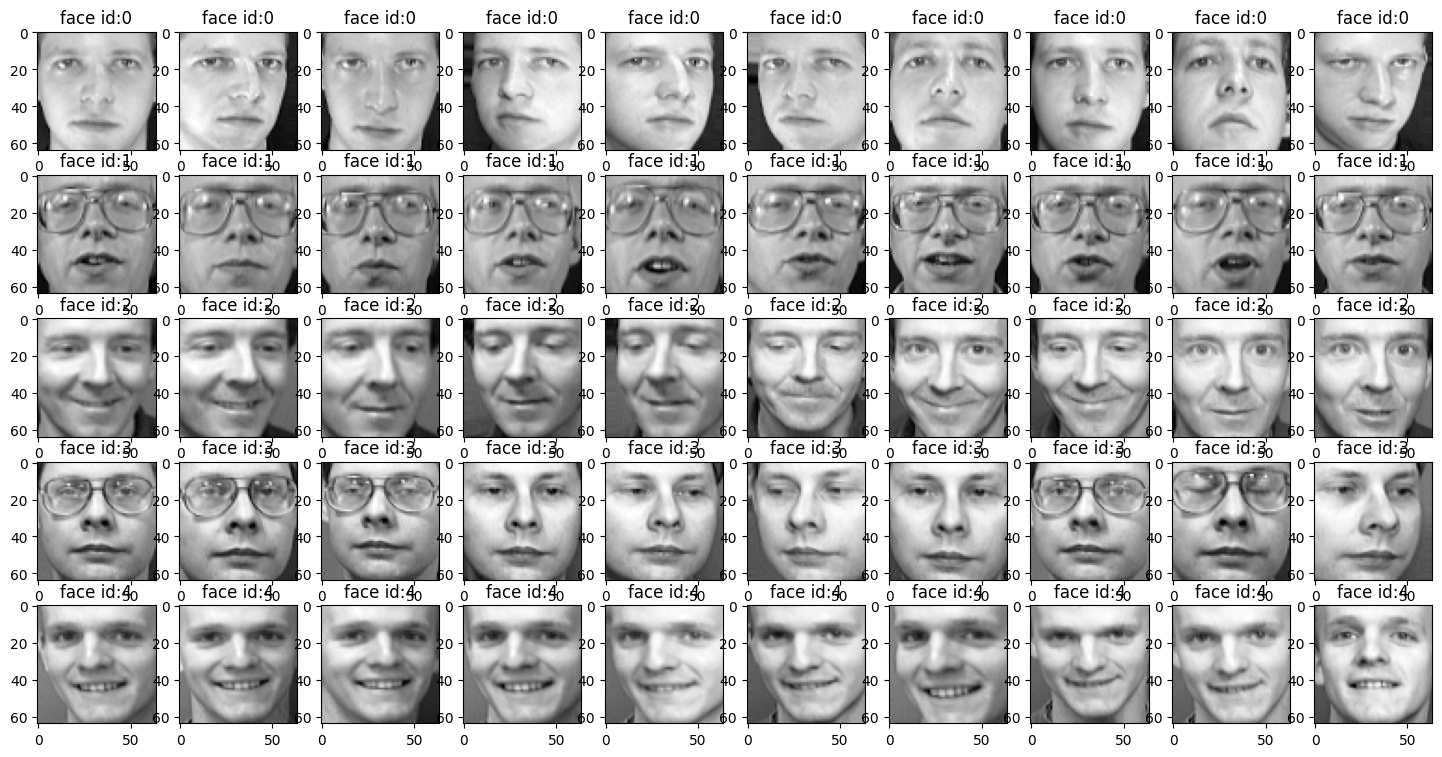

In [12]:
#Display all 10 images of first 5 people
cols = 10
subject_ids=[0, 1, 2, 3, 4]
rows = (len(subject_ids)*10)//cols
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
for i, subject_ids in enumerate(subject_ids):
    for j in range(cols):
        img_id = subject_ids*10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')
        axarr[i, j].set_title("face id:{}".format(subject_ids))

In [15]:
#Split the data into test and train data. Select test size = 20%
target = to_categorical(target, num_classes=len(np.unique(target)))

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)


In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)


In [18]:
#Remember the third dimension is important for keras so specify that third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [30]:
#Define the architecture of the convolutional neural network
model = Sequential()
#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))

#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(4, 4)))

#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))

#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(4, 4)))

#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))

#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))

#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [31]:
#Print a summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 40)                  │          10,280 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,816 (421.16 KB)

 Trainable params: 107,816 (421.16 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
import random

# Set seed for Python's random module
random.seed(42)

# Set seed for NumPy
np.random.seed(42)


# Set seed for TensorFlow
tf.random.set_seed(42)

In [41]:
#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=4, epochs=15, verbose=1)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.8906 - val_loss: 0.3635
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.8906 - val_loss: 0.3614
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.8906 - val_loss: 0.3591
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.8906 - val_loss: 0.3576
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.8906 - val_loss: 0.3558
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.8906 - val_loss: 0.3531
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.8906 - val_loss: 0.3515
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.8906 - v

In [42]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print(f"the test loss {test_loss} and test acc {test_acc}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9156 - loss: 0.2830
the test loss 0.2569625973701477 and test acc 0.925000011920929


In [49]:
y_pred = model.predict(X_test,verbose=2)
print("labels after predict x test",y_pred)



3/3 - 0s - 27ms/step
labels after predict x test [[2.1281562e-06 5.2645955e-06 6.6684745e-04 ... 4.4081494e-04
  7.8032244e-06 2.3360777e-05]
 [9.3475704e-05 1.6877874e-04 8.7785875e-06 ... 3.4539025e-06
  6.9972459e-04 2.8732484e-07]
 [1.0160769e-04 6.9531707e-05 1.3678770e-06 ... 8.6264095e-05
  6.2587460e-05 4.6149228e-07]
 ...
 [3.0853938e-05 1.4877458e-04 8.6668365e-07 ... 2.5669538e-06
  1.4101245e-04 8.8077826e-08]
 [3.2704833e-07 1.1637616e-05 1.7320552e-04 ... 3.8569171e-05
  1.9467510e-05 1.7218554e-06]
 [4.2412958e-05 1.1402541e-05 1.8716613e-06 ... 1.1796268e-05
  9.2350325e-05 4.2766301e-06]]


Test Loss: 0.2569625973701477
Test Accuracy: 0.925000011920929


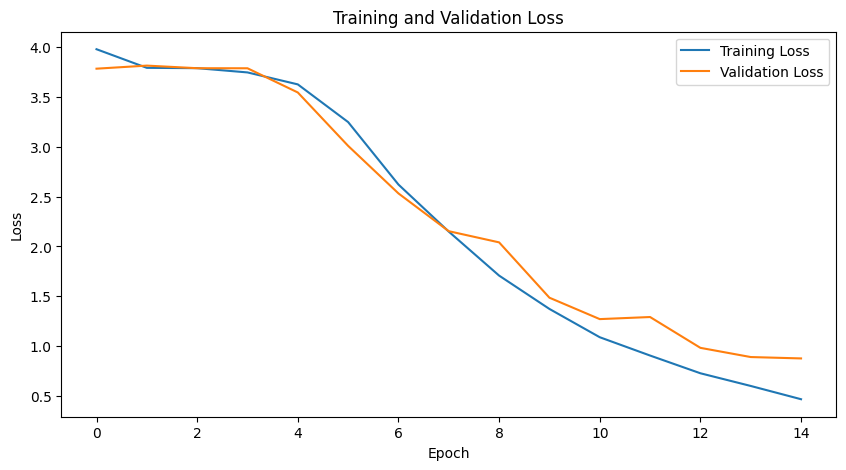

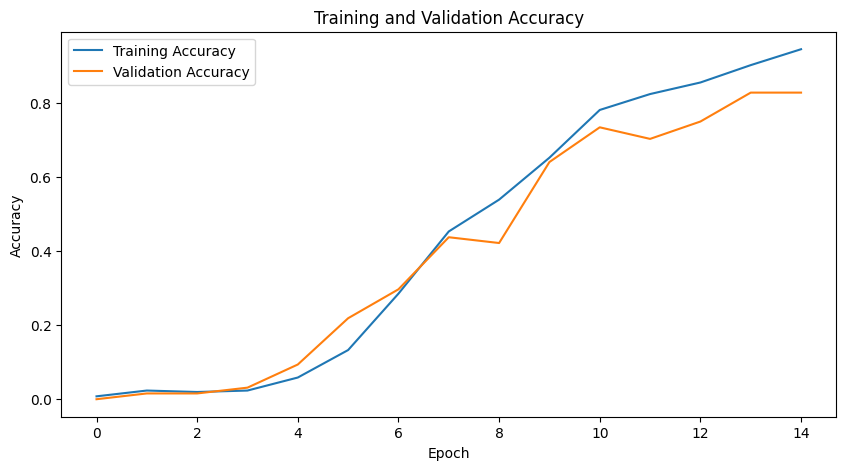

In [50]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

# Print the test accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Confusion Matrix:
[[5 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


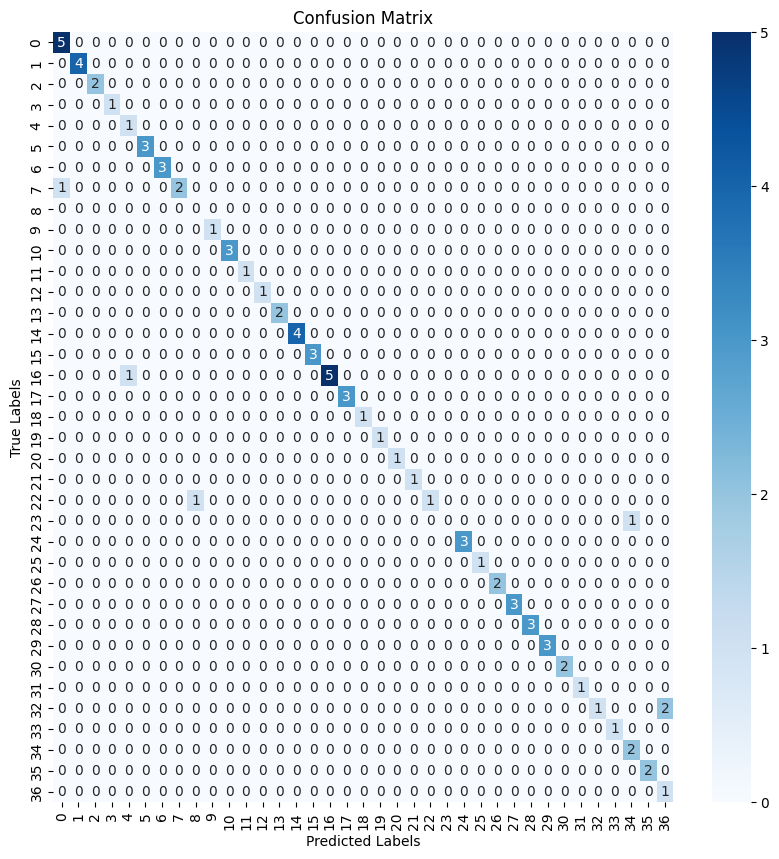

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_pred contains probabilities, convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(cm)

# Example visualization using matplotlib (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [53]:
# Assuming y_pred contains probabilities, convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)
print(y_pred_classes)
print(y_true_classes)

[13 30 34 19 24  6 15 26 14 21  3 13 11 39  1  5 29 14 20 19 17 26 12 39
 17 31  0  1 28 10 17 30 33 22  6  7  9 17 17 39 10 32  0  0 29  5 37 36
 15 23  8 14 29  4 28 31  5  1  2  4  7 27  0 35 19 37 14  0 15 31  0 26
  6  2 10  1 36 30 36 32]
[13 30 34 19 24  6 15 26 14 21  3 13 11 34  1  5 29 14 20 19 17 26 12 34
 17 31  7  1 28 10 17 30 33 22  6  7  9 17 17 39 10 32  0  0 29  5 37 25
 15 23 24 14 29 17 28 31  5  1  2  4  7 27  0 35 19 37 14  0 15 31  0 26
  6  2 10  1 36 30 36 32]


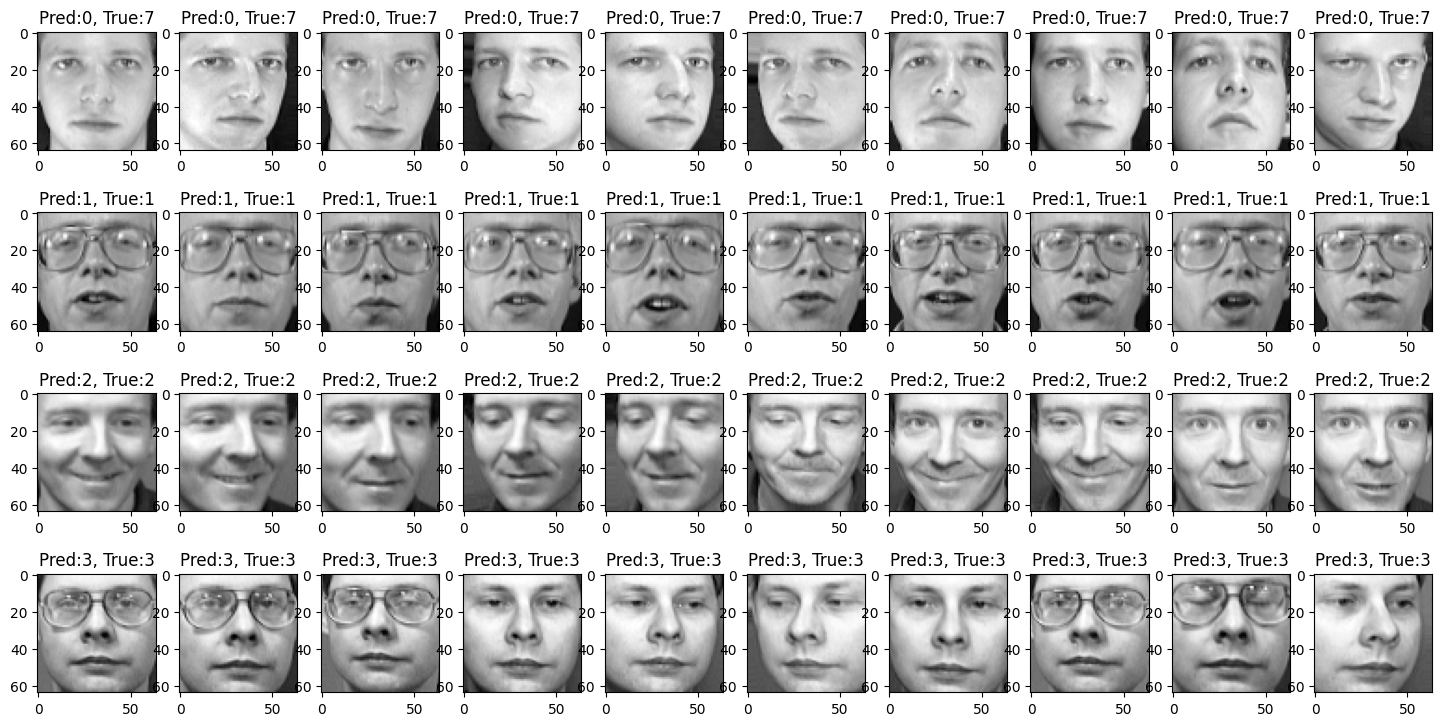

In [58]:
# Display images based on predictions with true labels for the first 5 people
cols = 10
unique_pred_ids = np.unique(y_pred_classes)[:4]  # Get unique predicted IDs for the first 5 people
rows = len(unique_pred_ids)  # Calculate the number of rows needed

fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))

for i, subject_id in enumerate(unique_pred_ids):
    for j in range(cols):
        img_id = subject_id * 10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')

        # Get true label for the current image
        true_label = y_true_classes[np.where(y_pred_classes == subject_id)[0][0]]

        axarr[i, j].set_title(f"Pred:{subject_id}, True:{true_label}") # Display both predicted and true labels